<a href="https://colab.research.google.com/github/P0LEnri/P0LEnri.github.io/blob/main/FakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Natural Lenguage Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#imports
# Pandas & numpy:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Pandas & numpy:
import numpy as np
import pandas as pd
from scipy.sparse import hstack

# scikit-learn:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.svm import SVC

# Text data cleaning:
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer
import string

# Gensim:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from sklearn.metrics import f1_score
nltk.download('stopwords')
# Cargar el modelo preentrenado en español
import spacy
spacy.cli.download("es_core_news_sm")
nlp = spacy.load("es_core_news_sm")
# Descargar recursos necesarios para nltk (si no están ya descargados)
nltk.download("punkt")



#BERTA
!pip install datasets
!pip install transformers[torch]
from datasets import list_datasets
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from transformers import RobertaTokenizer,  RobertaForSequenceClassification, TrainingArguments, Trainer
from transformers import pipeline
import torch

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.7/270.7 kB 7.4 MB/s eta 0:00:00


In [ ]:

#Cargar/Hacer dataset

# Loading the onlytrue1000 dataset:

true_df=pd.read_csv("/content/onlytrue1000.csv")
true_df

# Loading the onlyfakes1000 dataset:

fake_df=pd.read_csv("/content/onlyfakes1000.csv")
fake_df

true_df["class"]=0 # fake_new_class in true_df =0. Because all news in this dataset are true.
fake_df["class"]=1 # fake_new_class in fake_df =1. Because all news in this dataset are fake

df=pd.concat([true_df,fake_df],axis=0).reset_index(drop=True)

#"fake_new_class" should be a categorical feature. Instead, is an integer.
# In the next cell, we will change it to the correct data type.
df.astype({'class': 'category'}).dtypes

# Checking the balance of the dataset
class_distribution = df['class'].value_counts()
print(df)
#df['text'] = df['text'].str.lower()
print(df)
# Displaying the distribution
print(class_distribution)




                                                   text  class
0      Algunas de las voces extremistas más conocida...      0
1      Después de casi dos años y medio de luchas po...      0
2      Dos periodistas birmanos de la agencia Reuter...      0
3      El Cuerpo Nacional de Policía ha detenido a c...      0
4      El desfile de la firma en Roma se convierte e...      0
...                                                 ...    ...
1995  Reenviado... Me acaban de llegar a casa por co...      1
1996  JULIO ANGUITA: "El que debería estar en la cár...      1
1997  Otegi reclama la salida de prisión de todos lo...      1
1998  Otegi reclama la salida de prisión de todos lo...      1
1999  ¡ALERTA! ¡Estos paquetes de merienda son pelig...      1

[2000 rows x 2 columns]
                                                   text  class
0      Algunas de las voces extremistas más conocida...      0
1      Después de casi dos años y medio de luchas po...      0
2      Dos periodistas birmano

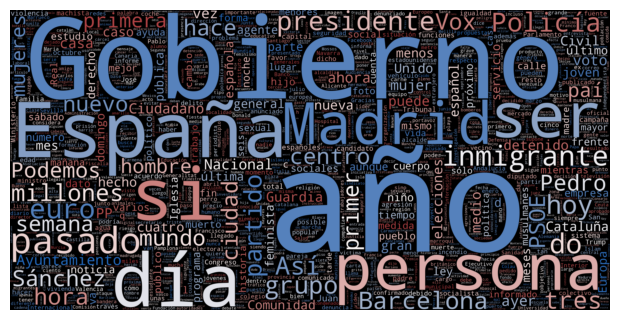

In [ ]:
# Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
stop_words = list(stopwords.words('spanish'))

# I realized that the stop_words list does not include some important Spanish prepositions such as "según" or "tras".
# I extend the list including these additional terms.

stop_words.extend(['según','tras','cabe','bajo', 'durante', 'mediante', 'so','toda','todas','cada','me','después','despues','segun','solo','sido','estan','lunes','martes','miércoles','jueves','viernes'])

# Wordcloud visualization for the real news

text= " ".join(df.text)

# Generate worldcloud

plt.figure(figsize=(6,6))

word_cloud = WordCloud(
        max_words=1500,
        width=3000,
        height=1500,
        random_state=42,
        colormap="vlag",
        collocations=False,
        stopwords= stop_words,
        ).generate(text)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

In [ ]:
##################################################################################
#############             LEMATIZAR          #####################################

# Lematizar una columna de textos y agregar los resultados como una nueva columna
def lematizar_y_agregar(df, columna_texto):
    lemas_unidos = []
    for texto in df[columna_texto]:
        doc = nlp(texto)
        lemas = ' '.join([token.lemma_ for token in doc])
        lemas_unidos.append(lemas)
    df['lematizado'] = lemas_unidos

# Llamar a la función para lematizar y agregar la nueva columna
lematizar_y_agregar(df, 'text')

# Imprimir el DataFrame con la nueva columna
print(df)


                                                   text  fake_new_class  \
0      Algunas de las voces extremistas más conocida...               0   
1      Después de casi dos años y medio de luchas po...               0   
2      Dos periodistas birmanos de la agencia Reuter...               0   
3      El Cuerpo Nacional de Policía ha detenido a c...               0   
4      El desfile de la firma en Roma se convierte e...               0   
...                                                 ...             ...   
1995  Reenviado... Me acaban de llegar a casa por co...               1   
1996  JULIO ANGUITA: "El que debería estar en la cár...               1   
1997  Otegi reclama la salida de prisión de todos lo...               1   
1998  Otegi reclama la salida de prisión de todos lo...               1   
1999  ¡ALERTA! ¡Estos paquetes de merienda son pelig...               1   

                                             lematizado  
0       alguno de el voz extremista más c

In [ ]:
import string
import pandas as pd

# Lista de signos de puntuación
signos_puntuacion = set(string.punctuation)


# Contar signos de puntuación en una columna de textos y agregar los resultados como una nueva columna
def contar_signos_puntuacion_y_agregar(df, columna_texto, signos_puntuacion):
    numeros_signos = []
    for texto in df[columna_texto]:
        num_signos_puntuacion = sum(1 for caracter in texto if caracter in signos_puntuacion)
        numeros_signos.append(num_signos_puntuacion)
    df['numeros_signos_puntuacion'] = numeros_signos

# Llamar a la función para contar signos de puntuación y agregar la nueva columna
contar_signos_puntuacion_y_agregar(df, 'text', signos_puntuacion)

# Imprimir el DataFrame con la nueva columna
print(df)


                                                   text  fake_new_class  \
0      Algunas de las voces extremistas más conocida...               0   
1      Después de casi dos años y medio de luchas po...               0   
2      Dos periodistas birmanos de la agencia Reuter...               0   
3      El Cuerpo Nacional de Policía ha detenido a c...               0   
4      El desfile de la firma en Roma se convierte e...               0   
...                                                 ...             ...   
1995  Reenviado... Me acaban de llegar a casa por co...               1   
1996  JULIO ANGUITA: "El que debería estar en la cár...               1   
1997  Otegi reclama la salida de prisión de todos lo...               1   
1998  Otegi reclama la salida de prisión de todos lo...               1   
1999  ¡ALERTA! ¡Estos paquetes de merienda son pelig...               1   

                                             lematizado  verbos_asertivos  \
0       alguno de el v

In [ ]:
# Descargar recursos necesarios para nltk (si no están ya descargados)
nltk.download("punkt")

# Lista de verbos asertivos (puedes expandir esta lista según tus necesidades)
verbos_asertivos = [
    "decir", "afirmar", "asegurar", "explicar", "manifestar", "opinar", "sostener", "indicar", "aseverar", "confirmar",
    "asegurar", "aseverar", "garantizar", "ratificar", "certificar", "postular", "reafirmar", "asegurarse", "corroborar",
    "aseverar", "atestiguar", "asegurar", "proclamar", "asegurarse", "respaldar", "subrayar", "aseverar", "garantizar",
    "proponer", "enunciar", "testificar", "avalar", "proclamar", "argumentar", "asegurar", "testificar", "reiterar",
    "proclamar", "reconocer", "afianzar", "subrayar", "aseverar", "manifestar", "testificar", "probar", "reafirmar",
    "aseverar", "revelar", "informar", "anunciar", "declarar", "comunicar", "denunciar", "expresar", "señalar",
    "exponer", "subrayar", "destacar", "indicar", "asegurar", "confirmar", "subrayar", "advertir", "subrayar",
    "afirmar", "asegurar", "manifestar", "aseverar", "ratificar", "subrayar", "informar", "reportar", "anunciar",
    "pronunciar", "exponer", "detallar", "desvelar", "divulgar", "asegurar", "resaltar", "subrayar", "subrayar",
    "destacar", "revelar", "confirmar", "aseverar", "asegurar", "informar", "anunciar", "explicar", "aseverar",
    "asegurar", "confirmar", "señalar", "revelar", "denunciar", "subrayar", "anunciar", "comunicar", "informar",
    "asegurar", "afirmar", "subrayar", "confirmar", "anunciar", "asegurar", "informar", "exponer", "explicar"
]

# Contar verbos asertivos en una columna de textos y agregar los resultados como una nueva columna
def contar_verbos_asertivos_y_agregar(df, columna_texto, verbos_asertivos):
    resultados = []
    for texto in df[columna_texto]:
        palabras = nltk.word_tokenize(texto, language='spanish')
        contador = sum(1 for palabra in palabras if palabra.lower() in verbos_asertivos)
        resultados.append(contador)
    df['verbos_asertivos'] = resultados

# Llamar a la función para contar verbos asertivos y agregar la nueva columna
contar_verbos_asertivos_y_agregar(df, 'lematizado', verbos_asertivos)

# Imprimir el DataFrame con la nueva columna
print(df)





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                   text  fake_new_class  \
0      Algunas de las voces extremistas más conocida...               0   
1      Después de casi dos años y medio de luchas po...               0   
2      Dos periodistas birmanos de la agencia Reuter...               0   
3      El Cuerpo Nacional de Policía ha detenido a c...               0   
4      El desfile de la firma en Roma se convierte e...               0   
...                                                 ...             ...   
1995  Reenviado... Me acaban de llegar a casa por co...               1   
1996  JULIO ANGUITA: "El que debería estar en la cár...               1   
1997  Otegi reclama la salida de prisión de todos lo...               1   
1998  Otegi reclama la salida de prisión de todos lo...               1   
1999  ¡ALERTA! ¡Estos paquetes de merienda son pelig...               1   

                                             lematizado  verbos_asertivos  \
0       alguno de el v

In [ ]:

# Getting the Spanish stop_words:

stop_words = list(stopwords.words('spanish'))

# I realized that the stop_words list does not include some important Spanish prepositions such as "según" or "tras".
# I extend the list including these additional terms.

stop_words.extend(['según','tras','cabe','bajo', 'durante', 'mediante', 'so','toda','todas','cada','me','después','despues','segun','solo','sido','estan','lunes','martes','miércoles','jueves','viernes'])
# Funtion for cleaning the dataset:

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

# Apply the function to the dataframe
df['clean_text'] = df['lematizado'].apply(preprocess)


# join the words into a string
df['clean_joined'] = df['clean_text'].apply(lambda x: " ".join(x))



In [ ]:
#CARGAR FAKE NEWS JKUNTO
import pandas as pd

# Lee el archivo CSV
df = pd.read_csv("/content/fakeNews.csv", encoding='ISO-8859-1')

# Reemplaza los valores en la columna 'class'
df['class'].replace({True: 0, False: 1}, inplace=True)

# Muestra el DataFrame resultante
print(df)



      class                                               text
0         0  Algunas de las voces extremistas mï¿½ï¿½s cono...
1         0  Despuï¿½ï¿½s de casi dos aï¿½ï¿½os y medio de ...
2         0  Dos periodistas birmanos de la agencia Reuters...
3         0  El Cuerpo Nacional de Policï¿½ï¿½a ha detenido...
4         0  El desfile de la firma en Roma se convierte en...
...     ...                                                ...
3563      0  "Meryl Streep disfrutï¿½ï¿½ unos premios Oscar...
3564      1  "EL PLAGIO DE LANA DEL REY A RADIOHEAD FUE ACO...
3565      0  "Ricardo Arjona lanza una serie documental por...
3566      0  "Raï¿½ï¿½l Araiza sorprende a Andrea Legarreta...
3567      1  "Adal Ramones protagonizarï¿½ï¿½ el remake de ...

[3568 rows x 2 columns]


In [ ]:
#Separar train y test
X=df['text']
y=df['class']

# split data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

# Imprimir características del conjunto de entrenamiento
print("Conjunto de entrenamiento (Train):")
print("Número de datos:", len(X_train))
print("Clases y su distribución:")
print(y_train.value_counts())

# Imprimir características del conjunto de prueba
print("\nConjunto de prueba (Test):")
print("Número de datos:", len(X_test))
print("Clases y su distribución:")
print(y_test.value_counts())


Conjunto de entrenamiento (Train):
Número de datos: 1600
Clases y su distribución:
0    801
1    799
Name: class, dtype: int64

Conjunto de prueba (Test):
Número de datos: 400
Clases y su distribución:
1    201
0    199
Name: class, dtype: int64


In [ ]:
factive_verbs = [
    "saber", "creer", "recordar", "lamentar", "suponer",
    "imaginar", "agradecer", "confirmar", "pensar", "conocer",
    "aceptar", "afirmar", "anunciar", "asegurar", "advertir",
    "decidir", "declarar", "descubrir", "confiar", "darse cuenta",
    "demostrar", "enterarse", "garantizar", "jurar", "notar",
    "observar", "percibir", "presumir", "probar", "revelar",
    "sentir", "testificar", "advertir", "ver", "comprender"
]
verbos_asertivos_pesos = {
    "informar": 3, "reportar": 3, "anunciar": 2, "declarar": 2, "afirmar": 3,
    "asegurar": 3, "explicar": 2, "manifestar": 2, "opinar": 2, "sostener": 2,
    "indicar": 3, "aseverar": 3, "confirmar": 3, "garantizar": 3, "ratificar": 3,
    "certificar": 3, "postular": 2, "reafirmar": 3, "asegurarse": 3, "corroborar": 3,
    "atestiguar": 2, "proclamar": 2, "respaldar": 2, "subrayar": 2, "proponer": 2,
    "enunciar": 2, "testificar": 2, "avalar": 2, "argumentar": 2, "reiterar": 2,
    "reconocer": 2, "afianzar": 2, "probar": 2, "revelar": 2, "informar": 3,
    "anunciar": 2, "pronunciar": 2, "exponer": 2, "detallar": 2, "desvelar": 2,
    "divulgar": 2, "resaltar": 2, "advertir": 2, "destacar": 2,

}
# Lista de signos de puntuación
signos_puntuacion = ['.', ',', ';', ':', '!', '¡', '?', '¿', '(', ')', '[', ']', '{', '}', '...', '«', '»', '—', '-', '–', '...', '...', '"', "'", '“', '”', '‘', '’']

# Contar verbos asertivos y agregar la nueva columna
# Asignar pesos a los verbos asertivos y obtener la suma acumulada
def asignar_pesos_acumulado(textos, verbos_asertivos_pesos):
    resultados = []
    for texto in textos:
        palabras = nltk.word_tokenize(texto, language='spanish')
        acumulado = sum(verbos_asertivos_pesos.get(palabra.lower(), 0) for palabra in palabras)
        resultados.append(acumulado)
    return np.array(resultados).reshape(-1, 1)  # Convertir la lista a un array de NumPy y cambiar la forma

# Llamar a la función para contar verbos asertivos en X_train y obtener el array
numeros_verbos_asertivos_train = asignar_pesos_acumulado(X_train, verbos_asertivos_pesos)
#print(numeros_verbos_asertivos_train)
print("Forma del array:", numeros_verbos_asertivos_train.shape)



# Contar verbos factive factous y agregar la nueva columna
def contar_verbos_factous_y_agregar(textos, factive_verbs):
    resultados = []
    for texto in textos:
        palabras = nltk.word_tokenize(texto, language='spanish')
        contador = sum(1 for palabra in palabras if palabra.lower() in factive_verbs)
        resultados.append(contador)
    return np.array(resultados).reshape(-1, 1)  # Convertir la lista a un array de NumPy y cambiar la forma

# Llamar a la función para contar verbos asertivos en X_train y obtener el array
numeros_verbos_factous_train = contar_verbos_factous_y_agregar(X_train, factive_verbs)
#print(numeros_verbos_asertivos_train)
print("Forma del array:", numeros_verbos_factous_train.shape)


import numpy as np

# Definir la función para contar signos de puntuación
# Función para contar signos de puntuación
def contar_signos_puntuacion(textos, signos_puntuacion):
    numeros_signos = []
    for texto in textos:
        num_signos_puntuacion = sum(1 for caracter in texto if caracter in signos_puntuacion)
        numeros_signos.append(num_signos_puntuacion)
    return np.array(numeros_signos).reshape(-1, 1)  # Convertir la lista a un array de NumPy y cambiar la forma

# Llamar a la función para contar signos de puntuación en X_train
numeros_signos_puntuacion_train = contar_signos_puntuacion(X_train, signos_puntuacion)

# Imprimir el array con los resultados y su forma
#print(numeros_signos_puntuacion_train)
print("Forma del array:", numeros_signos_puntuacion_train.shape)

##################################################################################################################


# Contar verbos asertivos y agregar la nueva columna
def asignar_pesos_acumulado(textos, verbos_asertivos_pesos):
    resultados = []
    for texto in textos:
        palabras = nltk.word_tokenize(texto, language='spanish')
        acumulado = sum(verbos_asertivos_pesos.get(palabra.lower(), 0) for palabra in palabras)
        resultados.append(acumulado)
    return np.array(resultados).reshape(-1, 1)  # Convertir la lista a un array de NumPy y cambiar la forma

# Llamar a la función para contar verbos asertivos en X_train y obtener el array
numeros_verbos_asertivos_test = asignar_pesos_acumulado(X_test, verbos_asertivos_pesos)
#print(numeros_verbos_asertivos_test)
print("Forma del array:", numeros_verbos_asertivos_test.shape)





# Contar verbos factive factous y agregar la nueva columna
def contar_verbos_factous_y_agregar(textos, factive_verbs):
    resultados = []
    for texto in textos:
        palabras = nltk.word_tokenize(texto, language='spanish')
        contador = sum(1 for palabra in palabras if palabra.lower() in factive_verbs)
        resultados.append(contador)
    return np.array(resultados).reshape(-1, 1)  # Convertir la lista a un array de NumPy y cambiar la forma

# Llamar a la función para contar verbos asertivos en X_train y obtener el array
numeros_verbos_factous_test = contar_verbos_factous_y_agregar(X_test, factive_verbs)
#print(numeros_verbos_asertivos_train)
print("Forma del array:", numeros_verbos_factous_test.shape)





import numpy as np

# Definir la función para contar signos de puntuación
# Función para contar signos de puntuación
def contar_signos_puntuacion(textos, signos_puntuacion):
    numeros_signos = []
    for texto in textos:
        num_signos_puntuacion = sum(1 for caracter in texto if caracter in signos_puntuacion)
        numeros_signos.append(num_signos_puntuacion)
    return np.array(numeros_signos).reshape(-1, 1)  # Convertir la lista a un array de NumPy y cambiar la forma

# Llamar a la función para contar signos de puntuación en X_train
numeros_signos_puntuacion_test = contar_signos_puntuacion(X_test, signos_puntuacion)

# Imprimir el array con los resultados y su forma
#print(numeros_signos_puntuacion_test)
print("Forma del array:", numeros_signos_puntuacion_test.shape)


Forma del array: (1600, 1)
Forma del array: (1600, 1)
Forma del array: (1600, 1)
Forma del array: (400, 1)
Forma del array: (400, 1)
Forma del array: (400, 1)


In [ ]:
# Crear diferentes representaciones de texto
vectorizador = CountVectorizer()
vectorizador = CountVectorizer(binary = True)
#vectorizador = TfidfVectorizer()
X_train_vectorizado = vectorizador.fit_transform(X_train)
X_test_vectorizado = vectorizador.transform(X_test)
print(X_train_vectorizado.shape, X_test_vectorizado.shape)

(1600, 11666) (400, 11666)


In [ ]:
#aditional feautres

print(X_train_vectorizado.shape)

X_train_vectorizado = hstack([X_train_vectorizado,
                              numeros_signos_puntuacion_train,
                              numeros_verbos_asertivos_train,
                              numeros_verbos_factous_train])
print(X_train_vectorizado.shape)

print(X_test_vectorizado.shape)
X_test_vectorizado = hstack([X_test_vectorizado,
                             numeros_signos_puntuacion_test,
                             numeros_verbos_asertivos_test,
                             numeros_verbos_factous_test])
print(X_test_vectorizado.shape)


(1600, 11666)
(1600, 11669)
(400, 11666)
(400, 11669)


In [ ]:
#Entrenamiento

# Split the training set into 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Define models
models = [
    #LogisticRegression(max_iter=10000),
    #MLPClassifier(hidden_layer_sizes=(50, 50),
     #             activation='tanh',
      #            learning_rate_init=0.01,
       #           max_iter=100,
        #          solver='adam',
         #         validation_fraction=0.2),
    #SVC(kernel='linear', C=1, gamma='auto'),
    MultinomialNB(),
    BernoulliNB(),
]

# Train different Machine Learning models and calculate average f1 macro
best_model = None
best_f1_macro = 0

for model in models:
    print("jheje")

    # Train the model without standardizing features
    scores = cross_validate(model, X_train_vectorizado, y_train, cv=kf, scoring='f1_macro', return_train_score=False, error_score='raise')
    avg_f1_macro = scores['test_score'].mean()

    print(f'{model.__class__.__name__} - Average F1 Macro: {avg_f1_macro}')

    if avg_f1_macro > best_f1_macro:
        best_f1_macro = avg_f1_macro
        best_model = model

# Select the best adjusted model
print(f'\nBest Model: {best_model.__class__.__name__} with F1 Macro: {best_f1_macro}')





jheje
MultinomialNB - Average F1 Macro: 0.8131145654857337
jheje
BernoulliNB - Average F1 Macro: 0.8082369539986441

Best Model: MultinomialNB with F1 Macro: 0.8131145654857337


In [ ]:
# Tradicional  en test
modelTradicional=MultinomialNB()
modelTradicional.fit(X_train_vectorizado, y_train)
y_predTradicional=modelTradicional.predict(X_test_vectorizado)

print('Classifcation report:\n', classification_report(y_test, y_predTradicional))




Classifcation report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       199
           1       0.76      0.74      0.75       201

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



In [ ]:

ckpt = "Narrativaai/fake-news-detection-spanish"

classifier = pipeline("text-classification", model=ckpt)

headline = " "
text = df['text'][2]

print(classifier(headline + " [SEP] " + text))


config.json:   0%|          | 0.00/898 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/858k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/516k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.48M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

[{'label': 'REAL', 'score': 0.999237060546875}]


In [ ]:
headline = "" #"¡Extra, extra! ¡Histórico triunfo para los Pumas en el Clausura 2023! "
text = "La noticia que ha surgido, proclamando a los Pumas como campeones del Clausura 2023, ha generado asombro pero también ha avivado el escepticismo. Los informes, que narran un partido decisivo lleno de momentos épicos, parecen extraídos de un guion cinematográfico, lo que ha llevado a algunos aficionados y expertos a cuestionar la autenticidad de la noticia. A pesar de los detalles aparentemente convincentes, la ausencia de pruebas visuales, como imágenes o videos de la celebración, ha contribuido a la incertidumbre. La narrativa, enriquecida con la supuesta euforia de los hinchas y la celebración en redes sociales, suscita dudas sobre si se trata de un relato genuino o fabricado para captar la atención del público. Mientras no se presente evidencia más sólida o una confirmación oficial, persiste un escepticismo saludable entre algunos seguidores, quienes se preguntan si esta noticia sorprendente es verdadera o parte de una trama elaborada con ingenio. " #"En un giro inverosímil de los acontecimientos, se informa que los Pumas se han coronado campeones del Clausura 2023 en una narrativa que suscita dudas y escepticismo. La historia, llena de momentos épicos y celebraciones aparentemente exageradas, ha generado especulaciones entre aficionados y expertos, quienes cuestionan la autenticidad de la noticia. La ausencia de pruebas visuales, como imágenes o videos de la supuesta victoria, y la falta de detalles concretos sobre el partido en cuestión alimentan las sospechas sobre si esta noticia es más bien una trama inventada para captar la atención. Hasta que se presente evidencia sólida o una confirmación oficial, persiste el escepticismo sobre la sorprendente proclamación de los Pumas como campeones del Clausura 2023."
print()
print(classifier(headline + " [SEP] " + text))


[{'label': 'FAKE', 'score': 0.9999606609344482}]


In [ ]:
# Obtener predicciones en X_test
raw_predictions = [classifier(text) for text in X_test]



In [ ]:
print(raw_predictions[0][0]['label'])
print(raw_predictions)
# Mapear las etiquetas predichas a 0 o 1
predictions = [1 if prediction[0]['label'] == 'FAKE' else 0 for prediction in raw_predictions]

print(predictions)
# Convertir las etiquetas a numpy arrays para asegurar compatibilidad con f1_score
y_test_np = np.array(y_test)
predictions_np = np.array(predictions)

print('Classifcation report:\n', classification_report(y_test, predictions_np))



FAKE
[[{'label': 'FAKE', 'score': 0.9999268054962158}], [{'label': 'REAL', 'score': 0.9998831748962402}], [{'label': 'REAL', 'score': 0.9995869994163513}], [{'label': 'REAL', 'score': 0.9998713731765747}], [{'label': 'FAKE', 'score': 0.9979543685913086}], [{'label': 'FAKE', 'score': 0.9999456405639648}], [{'label': 'REAL', 'score': 0.9991675615310669}], [{'label': 'FAKE', 'score': 0.999954342842102}], [{'label': 'REAL', 'score': 0.9998471736907959}], [{'label': 'FAKE', 'score': 0.9999018907546997}], [{'label': 'REAL', 'score': 0.9998038411140442}], [{'label': 'REAL', 'score': 0.9998786449432373}], [{'label': 'FAKE', 'score': 0.9999697208404541}], [{'label': 'REAL', 'score': 0.9996771812438965}], [{'label': 'FAKE', 'score': 0.985518217086792}], [{'label': 'FAKE', 'score': 0.9971739053726196}], [{'label': 'REAL', 'score': 0.9996156692504883}], [{'label': 'REAL', 'score': 0.9993357062339783}], [{'label': 'FAKE', 'score': 0.9999734163284302}], [{'label': 'FAKE', 'score': 0.9985332489013672

In [ ]:
#Separar train , validation y test
X=df['text']
y=df['class']
# split data into test and train
X_traintemp, X_test, y_traintemp, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
#Separar train en train y validacion
X_train, X_validation, y_train, y_validation = train_test_split(X_traintemp, y_traintemp, test_size = 0.2,random_state=42)


# Contar el número de datos por clase en train
train_counts = y_train.value_counts()
print("Train - Clase 0: {}, Clase 1: {}".format(train_counts[0], train_counts[1]))

# Contar el número de datos por clase en validation
validation_counts = y_validation.value_counts()
print("Validation - Clase 0: {}, Clase 1: {}".format(validation_counts[0], validation_counts[1]))

# Contar el número de datos por clase en test
test_counts = y_test.value_counts()
print("Test - Clase 0: {}, Clase 1: {}".format(test_counts[0], test_counts[1]))



label_name = df["class"].unique()
print(label_name)
unique_classes_train = set(y_train)
unique_classes_validation = set(y_validation)
unique_classes_test = set(y_test)

num_classes_train = len(unique_classes_train)
num_classes_validation = len(unique_classes_validation)
num_classes_test = len(unique_classes_test)

print("Number of unique classes in training set:", num_classes_train)
print("Number of unique classes in validation set:", num_classes_validation)
print("Number of unique classes in test set:", num_classes_test)



Train - Clase 0: 625, Clase 1: 655
Validation - Clase 0: 176, Clase 1: 144
Test - Clase 0: 199, Clase 1: 201
[0 1]
Number of unique classes in training set: 2
Number of unique classes in validation set: 2
Number of unique classes in test set: 2


config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at PlanTL-GOB-ES/roberta-large-bne and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[0, 450, 1757, 66, 20826, 313, 355, 14385, 341, 3026, 404, 332, 5037, 21542, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Step,Training Loss,Validation Loss


{'test_loss': 0.335322767496109, 'test_accuracy': 0.8775, 'test_f1': 0.8774992343702148, 'test_runtime': 2.5004, 'test_samples_per_second': 159.971, 'test_steps_per_second': 19.996}
[[-1.5019531   2.1757812 ]
 [ 1.8505859  -1.8144531 ]
 [ 0.08398438  0.70703125]
 [ 1.7490234  -1.5732422 ]
 [ 0.27929688  0.32348633]
 [-1.1035156   1.8056641 ]
 [ 1.5878906  -1.1298828 ]
 [-0.49389648  1.0292969 ]
 [ 2.0019531  -1.9208984 ]
 [-1.8271484   2.3867188 ]
 [ 1.9443359  -1.6503906 ]
 [-0.3803711   0.9394531 ]
 [ 0.2607422   0.3466797 ]
 [ 1.5878906  -1.3115234 ]
 [ 2.09375    -1.8457031 ]
 [ 1.671875   -1.3984375 ]
 [ 1.5859375  -1.5380859 ]
 [ 1.8632812  -1.8486328 ]
 [-1.1904297   1.8388672 ]
 [-0.89208984  1.5908203 ]
 [ 1.9736328  -1.7890625 ]
 [-1.2978516   1.8017578 ]
 [-1.6337891   2.28125   ]
 [-1.6679688   2.2597656 ]
 [-1.0400391   1.6542969 ]
 [ 1.5019531  -1.4003906 ]
 [-1.53125     2.2714844 ]
 [ 1.2089844  -0.7675781 ]
 [ 1.7197266  -1.5664062 ]
 [ 1.7626953  -1.390625  ]
 [ 1.765

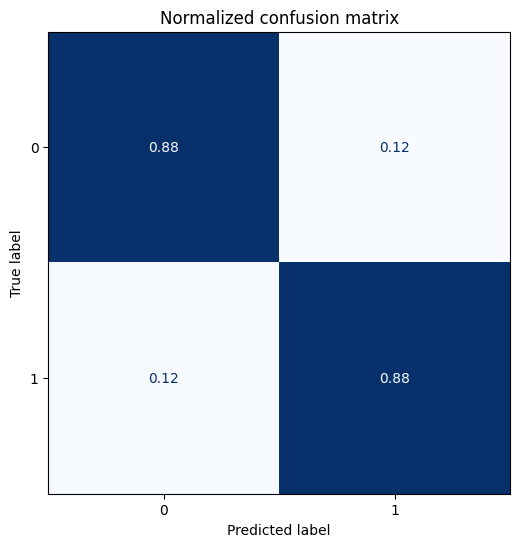

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       199
           1       0.88      0.88      0.88       201

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [ ]:
#roberta
# https://huggingface.co/roberta-base
# PlanTL-GOB-ES/roberta-large-bne

model_ckpt = "PlanTL-GOB-ES/roberta-large-bne"
#tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained(model_ckpt)


#Training using pretrained model weights

model_ckpt = "PlanTL-GOB-ES/roberta-large-bne"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = (RobertaForSequenceClassification.from_pretrained(model_ckpt, num_labels=2))


from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
 labels = pred.label_ids
 preds = pred.predictions.argmax(-1)
 f1 = f1_score(labels, preds, average="macro")
 acc = accuracy_score(labels, preds)
 return {"accuracy": acc, "f1": f1}




class Dataset(torch.utils.data.Dataset):
   def __init__(self, texts, labels=None):
       self.encodings = tokenizer(texts, padding=True, truncation=True, max_length=512)
       self.labels = labels
   def __getitem__(self, idx):
       item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
       if self.labels:
           item["labels"] = torch.tensor(self.labels[idx])
       return item
   def __len__(self):
       return len(self.encodings["input_ids"])



train_dataset = Dataset(X_train.tolist(), y_train.tolist())
validation_dataset = Dataset(X_validation.tolist(), y_validation.tolist())
test_dataset = Dataset(X_test.tolist(), y_test.tolist())



print (train_dataset.encodings["input_ids"][0])
tokens = tokenizer.convert_ids_to_tokens(train_dataset.encodings["input_ids"][0])
print (tokens)
print(tokenizer.convert_tokens_to_string(tokens))
print (train_dataset.labels[0])


training_args = TrainingArguments(
  output_dir="output",
  learning_rate=1e-5,
  weight_decay=0.01,
  evaluation_strategy="steps",
  eval_steps=500,
  num_train_epochs=1,
  seed=0,
  load_best_model_at_end=True,
  fp16=True)


trainer = Trainer(
 model=model,
 args = training_args,
 compute_metrics=compute_metrics,
 train_dataset=train_dataset,
 eval_dataset=validation_dataset,
 tokenizer=tokenizer
 )
trainer.train()



predictions = trainer.predict(test_dataset)
print (predictions.metrics)


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
 cm = confusion_matrix(y_true, y_preds, normalize="true")
 fig, ax = plt.subplots(figsize=(6, 6))
 disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
 disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
 plt.title("Normalized confusion matrix")
 plt.show()



 import numpy as np
print (predictions.predictions)
y_preds = np.argmax(predictions.predictions, axis=-1)
print (y_preds)
y_test = y_test.tolist()
print (y_test)
plot_confusion_matrix(y_preds, y_test, label_name)



from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))
#print(classification_report(y_test, y_preds, target_names=label_name))